## load data (hpi4 s8)

In [1]:
#for reference this can still be applied if you want to load the data at any point (e.g. in a napari script that shows results)
from skimage.io import imread
from skimage.measure import label, regionprops
import numpy as np
from scipy.spatial.distance import cdist
import os

rep = '2'
hpi = '4'
s = '8'
fov = '11'
round = '2'
inc = '6'
ft_values = [0.0, 1.0, 0.75, 0.5, 0.25]
ct_values = [-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0]

nuclei_folder = f'/home/s361852/Schreibtisch/data/processed/remapped_images_nuc/'
nuclei_pattern = f'remapped_{inc}Inc_PR8_Nepal_1MOI_{hpi}hpi_AllSegments_3R_50C__Region {fov}_Processed001_s0{s}_ch00_cp_masks.png'
nuclei_path = os.path.join(nuclei_folder, nuclei_pattern)
nuclei_masks = imread(nuclei_path)
nuclei_labels = label(nuclei_masks)

cyto_folder = f'/home/s361852/Schreibtisch/data/processed/postprocessed_images_cyto/'
cyto_pattern = f'outputs_remapped_ft0.0_ct-6.0_3nt3chan_rep2_1MOI_{hpi}hpi_fov{fov}_{inc}Inc_round02_ch0-2-4_s{s}_cp_masks.png'
cyto_path = os.path.join(cyto_folder, cyto_pattern)
cyto_masks = imread(cyto_path)
cytoplasma_labels = label(cyto_masks)

nuclei_GT_folder = f'/home/s361852/Schreibtisch/data/processed/ground_truth_nuc/'
nuclei_GT_pattern = f'GT_nuc_{inc}Inc_PR8_Nepal_1MOI_{hpi}hpi_AllSegments_3R_50C__Region {fov}_Processed001_s0{s}_ch00.tif'
nuclei_GT_path = os.path.join(nuclei_GT_folder, nuclei_GT_pattern)
nuclei_GT_masks = imread(nuclei_GT_path)
nuclei_GT_labels = label(nuclei_GT_masks)

cyto_GT_folder = f'/home/s361852/Schreibtisch/data/processed/ground_truth_cyto/'
cyto_GT_pattern = f'GT_3nt3chan_rep2_1MOI_{hpi}hpi_fov{fov}_6Inc_round02_ch0-2-4_s{s}.tif'
cyto_GT_path = os.path.join(cyto_GT_folder, cyto_GT_pattern)
cyto_GT_masks = imread(cyto_GT_path)
cytoplasma_GT_labels = label(cyto_GT_masks)

## nuc cyto coexistence

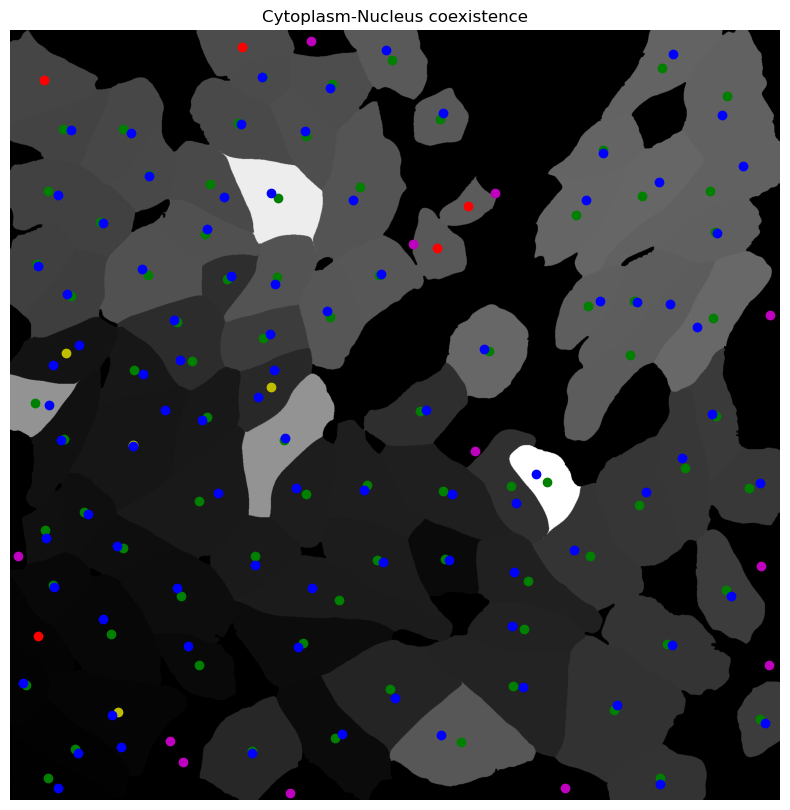

In [2]:
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import numpy as np
import builtins 


nuclei_labels = label(nuclei_masks)
cytoplasma_labels = label(cyto_masks)

cytoplasma_props = regionprops(cytoplasma_labels)
nuclei_props = regionprops(nuclei_labels)

min_area = 10  
cytoplasma_props_filtered = [prop for prop in cytoplasma_props if prop.area >= min_area]
nuclei_props_filtered = [prop for prop in nuclei_props if prop.area >= min_area]

nuclei_count_per_cytoplasm = np.zeros(len(cytoplasma_props_filtered), dtype=int)

nuclei_assigned = np.zeros(len(nuclei_props_filtered), dtype=bool)

for idx, cytoplasm_prop in enumerate(cytoplasma_props_filtered):
    cytoplasm_coords_set = set(map(tuple, cytoplasm_prop.coords))  

    for nucleus_idx, nucleus_prop in enumerate(nuclei_props_filtered):
        nucleus_coord = (int(builtins.round(nucleus_prop.centroid[0])), int(builtins.round(nucleus_prop.centroid[1])))  
        if nucleus_coord in cytoplasm_coords_set:  
            nuclei_count_per_cytoplasm[idx] += 1
            nuclei_assigned[nucleus_idx] = True 


count_yellow = 0
count_green = 0
count_red = 0
count_blue = 0
count_magenta = 0

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(cyto_masks, cmap='gray')

for idx, prop in enumerate(cytoplasma_props_filtered):
    y, x = prop.centroid
    if nuclei_count_per_cytoplasm[idx] > 1:
        ax.plot(x, y, 'yo', label='Cytoplasm with > 1 nucleus' if count_yellow == 0 else '')  # yellow colorcode
        count_yellow += 1
    elif nuclei_count_per_cytoplasm[idx] == 1:
        ax.plot(x, y, 'go', label='cytoplasm with exactly 1 nucleus' if count_green == 0 else '')  # green colorcode
        count_green += 1
    else:
        ax.plot(x, y, 'ro', label='Cytoplasm without nucleus' if count_red == 0 else '')  # red colorcode
        count_red += 1


for idx, prop in enumerate(nuclei_props_filtered):
    y, x = prop.centroid
    if nuclei_assigned[idx]:
        ax.plot(x, y, 'bo', label='nuc within cytoplasm ' if count_blue == 0 else '')  # blue colorcode
        count_blue += 1
    else:
        ax.plot(x, y, 'mo', label='nuc outside of cytoplasm' if count_magenta == 0 else '')  # magenta colorcode
        count_magenta += 1




ax.set_title('Cytoplasm-Nucleus coexistence')
ax.axis('off')
plt.show()


## load data (hpi5 s7)

In [3]:
#for reference this can still be applied if you want to load the data at any point (e.g. in a napari script that shows results)
from skimage.io import imread
from skimage.measure import label, regionprops
import numpy as np
from scipy.spatial.distance import cdist
import os

rep = '2'
hpi = '5'
s = '7'
fov = '13'
round = '2'
inc = '6'
ft_values = [0.0, 1.0, 0.75, 0.5, 0.25]
ct_values = [-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0]

nuclei_folder = f'/home/s361852/Schreibtisch/data/processed/remapped_images_nuc/'
nuclei_pattern = f'remapped_{inc}Inc_PR8_Nepal_1MOI_{hpi}hpi_AllSegments_3R_50C__Region {fov}_Processed001_s0{s}_ch00_cp_masks.png'
nuclei_path = os.path.join(nuclei_folder, nuclei_pattern)
nuclei_masks = imread(nuclei_path)
nuclei_labels = label(nuclei_masks)

cyto_folder = f'/home/s361852/Schreibtisch/data/processed/postprocessed_images_cyto/'
cyto_pattern = f'outputs_remapped_ft0.0_ct-6.0_3nt3chan_rep2_1MOI_{hpi}hpi_fov{fov}_{inc}Inc_round02_ch0-2-4_s{s}_cp_masks.png'
cyto_path = os.path.join(cyto_folder, cyto_pattern)
cyto_masks = imread(cyto_path)
cytoplasma_labels = label(cyto_masks)

nuclei_GT_folder = f'/home/s361852/Schreibtisch/data/processed/ground_truth_nuc/'
nuclei_GT_pattern = f'GT_nuc_{inc}Inc_PR8_Nepal_1MOI_{hpi}hpi_AllSegments_3R_50C__Region {fov}_Processed001_s0{s}_ch00.tif'
nuclei_GT_path = os.path.join(nuclei_GT_folder, nuclei_GT_pattern)
nuclei_GT_masks = imread(nuclei_GT_path)
nuclei_GT_labels = label(nuclei_GT_masks)

cyto_GT_folder = f'/home/s361852/Schreibtisch/data/processed/ground_truth_cyto/'
cyto_GT_pattern = f'GT_3nt3chan_rep2_1MOI_{hpi}hpi_fov{fov}_6Inc_round02_ch0-2-4_s{s}.tif'
cyto_GT_path = os.path.join(cyto_GT_folder, cyto_GT_pattern)
cyto_GT_masks = imread(cyto_GT_path)
cytoplasma_GT_labels = label(cyto_GT_masks)

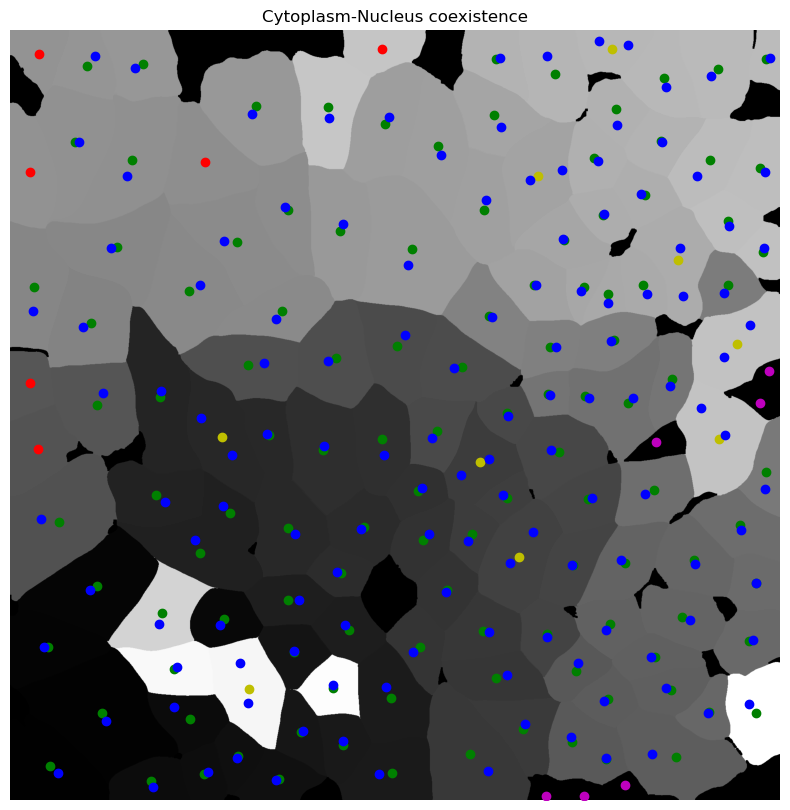

In [4]:
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import numpy as np
import builtins 


nuclei_labels = label(nuclei_masks)
cytoplasma_labels = label(cyto_masks)

cytoplasma_props = regionprops(cytoplasma_labels)
nuclei_props = regionprops(nuclei_labels)

min_area = 10  
cytoplasma_props_filtered = [prop for prop in cytoplasma_props if prop.area >= min_area]
nuclei_props_filtered = [prop for prop in nuclei_props if prop.area >= min_area]

nuclei_count_per_cytoplasm = np.zeros(len(cytoplasma_props_filtered), dtype=int)

nuclei_assigned = np.zeros(len(nuclei_props_filtered), dtype=bool)

for idx, cytoplasm_prop in enumerate(cytoplasma_props_filtered):
    cytoplasm_coords_set = set(map(tuple, cytoplasm_prop.coords))  

    for nucleus_idx, nucleus_prop in enumerate(nuclei_props_filtered):
        nucleus_coord = (int(builtins.round(nucleus_prop.centroid[0])), int(builtins.round(nucleus_prop.centroid[1])))  
        if nucleus_coord in cytoplasm_coords_set:  
            nuclei_count_per_cytoplasm[idx] += 1
            nuclei_assigned[nucleus_idx] = True 


count_yellow = 0
count_green = 0
count_red = 0
count_blue = 0
count_magenta = 0

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(cyto_masks, cmap='gray')

for idx, prop in enumerate(cytoplasma_props_filtered):
    y, x = prop.centroid
    if nuclei_count_per_cytoplasm[idx] > 1:
        ax.plot(x, y, 'yo', label='Cytoplasm with > 1 nucleus' if count_yellow == 0 else '')  # yellow colorcode
        count_yellow += 1
    elif nuclei_count_per_cytoplasm[idx] == 1:
        ax.plot(x, y, 'go', label='cytoplasm with exactly 1 nucleus' if count_green == 0 else '')  # green colorcode
        count_green += 1
    else:
        ax.plot(x, y, 'ro', label='Cytoplasm without nucleus' if count_red == 0 else '')  # red colorcode
        count_red += 1


for idx, prop in enumerate(nuclei_props_filtered):
    y, x = prop.centroid
    if nuclei_assigned[idx]:
        ax.plot(x, y, 'bo', label='nuc within cytoplasm ' if count_blue == 0 else '')  # blue colorcode
        count_blue += 1
    else:
        ax.plot(x, y, 'mo', label='nuc outside of cytoplasm' if count_magenta == 0 else '')  # magenta colorcode
        count_magenta += 1




ax.set_title('Cytoplasm-Nucleus coexistence')
ax.axis('off')
plt.show()


## load data (5hpi s8)

In [5]:
#for reference this can still be applied if you want to load the data at any point (e.g. in a napari script that shows results)
from skimage.io import imread
from skimage.measure import label, regionprops
import numpy as np
from scipy.spatial.distance import cdist
import os

rep = '2'
hpi = '5'
s = '8'
fov = '13'
round = '2'
inc = '6'
ft_values = [0.0, 1.0, 0.75, 0.5, 0.25]
ct_values = [-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0]

nuclei_folder = f'/home/s361852/Schreibtisch/data/processed/remapped_images_nuc/'
nuclei_pattern = f'remapped_{inc}Inc_PR8_Nepal_1MOI_{hpi}hpi_AllSegments_3R_50C__Region {fov}_Processed001_s0{s}_ch00_cp_masks.png'
nuclei_path = os.path.join(nuclei_folder, nuclei_pattern)
nuclei_masks = imread(nuclei_path)
nuclei_labels = label(nuclei_masks)

cyto_folder = f'/home/s361852/Schreibtisch/data/processed/postprocessed_images_cyto/'
cyto_pattern = f'outputs_remapped_ft0.0_ct-6.0_3nt3chan_rep2_1MOI_{hpi}hpi_fov{fov}_{inc}Inc_round02_ch0-2-4_s{s}_cp_masks.png'
cyto_path = os.path.join(cyto_folder, cyto_pattern)
cyto_masks = imread(cyto_path)
cytoplasma_labels = label(cyto_masks)

nuclei_GT_folder = f'/home/s361852/Schreibtisch/data/processed/ground_truth_nuc/'
nuclei_GT_pattern = f'GT_nuc_{inc}Inc_PR8_Nepal_1MOI_{hpi}hpi_AllSegments_3R_50C__Region {fov}_Processed001_s0{s}_ch00.tif'
nuclei_GT_path = os.path.join(nuclei_GT_folder, nuclei_GT_pattern)
nuclei_GT_masks = imread(nuclei_GT_path)
nuclei_GT_labels = label(nuclei_GT_masks)

cyto_GT_folder = f'/home/s361852/Schreibtisch/data/processed/ground_truth_cyto/'
cyto_GT_pattern = f'GT_3nt3chan_rep2_1MOI_{hpi}hpi_fov{fov}_6Inc_round02_ch0-2-4_s{s}.tif'
cyto_GT_path = os.path.join(cyto_GT_folder, cyto_GT_pattern)
cyto_GT_masks = imread(cyto_GT_path)
cytoplasma_GT_labels = label(cyto_GT_masks)

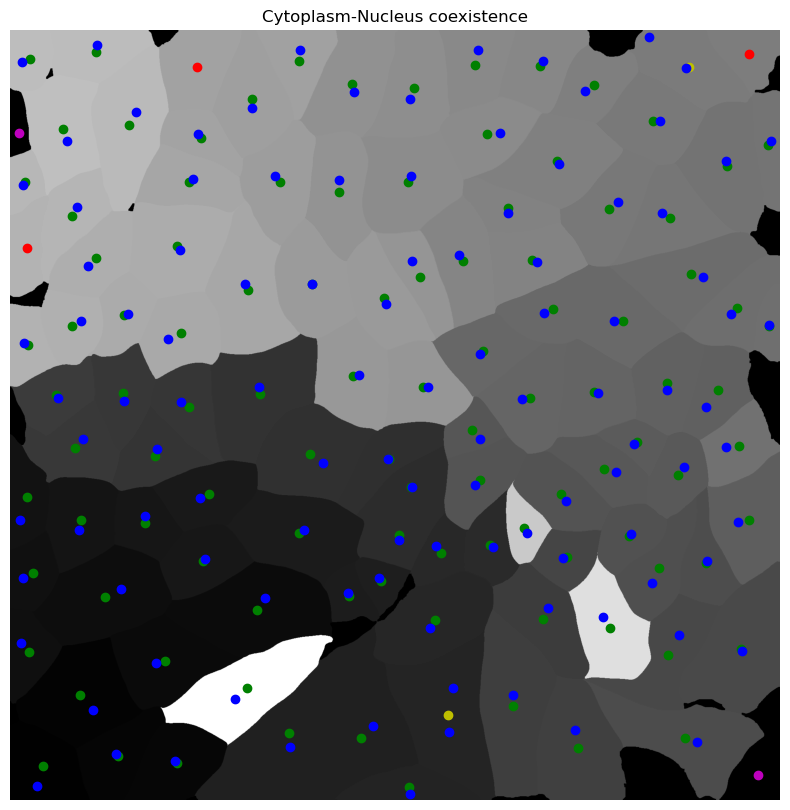

In [6]:
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import numpy as np
import builtins 


nuclei_labels = label(nuclei_masks)
cytoplasma_labels = label(cyto_masks)

cytoplasma_props = regionprops(cytoplasma_labels)
nuclei_props = regionprops(nuclei_labels)

min_area = 10  
cytoplasma_props_filtered = [prop for prop in cytoplasma_props if prop.area >= min_area]
nuclei_props_filtered = [prop for prop in nuclei_props if prop.area >= min_area]

nuclei_count_per_cytoplasm = np.zeros(len(cytoplasma_props_filtered), dtype=int)

nuclei_assigned = np.zeros(len(nuclei_props_filtered), dtype=bool)

for idx, cytoplasm_prop in enumerate(cytoplasma_props_filtered):
    cytoplasm_coords_set = set(map(tuple, cytoplasm_prop.coords))  

    for nucleus_idx, nucleus_prop in enumerate(nuclei_props_filtered):
        nucleus_coord = (int(builtins.round(nucleus_prop.centroid[0])), int(builtins.round(nucleus_prop.centroid[1])))  
        if nucleus_coord in cytoplasm_coords_set:  
            nuclei_count_per_cytoplasm[idx] += 1
            nuclei_assigned[nucleus_idx] = True 


count_yellow = 0
count_green = 0
count_red = 0
count_blue = 0
count_magenta = 0

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(cyto_masks, cmap='gray')

for idx, prop in enumerate(cytoplasma_props_filtered):
    y, x = prop.centroid
    if nuclei_count_per_cytoplasm[idx] > 1:
        ax.plot(x, y, 'yo', label='Cytoplasm with > 1 nucleus' if count_yellow == 0 else '')  # yellow colorcode
        count_yellow += 1
    elif nuclei_count_per_cytoplasm[idx] == 1:
        ax.plot(x, y, 'go', label='cytoplasm with exactly 1 nucleus' if count_green == 0 else '')  # green colorcode
        count_green += 1
    else:
        ax.plot(x, y, 'ro', label='Cytoplasm without nucleus' if count_red == 0 else '')  # red colorcode
        count_red += 1


for idx, prop in enumerate(nuclei_props_filtered):
    y, x = prop.centroid
    if nuclei_assigned[idx]:
        ax.plot(x, y, 'bo', label='nuc within cytoplasm ' if count_blue == 0 else '')  # blue colorcode
        count_blue += 1
    else:
        ax.plot(x, y, 'mo', label='nuc outside of cytoplasm' if count_magenta == 0 else '')  # magenta colorcode
        count_magenta += 1




ax.set_title('Cytoplasm-Nucleus coexistence')
ax.axis('off')
plt.show()


## load data (hpi6 s3)

In [7]:
#for reference this can still be applied if you want to load the data at any point (e.g. in a napari script that shows results)
from skimage.io import imread
from skimage.measure import label, regionprops
import numpy as np
from scipy.spatial.distance import cdist
import os

rep = '2'
hpi = '6'
s = '3'
fov = '15'
round = '2'
inc = '6'
ft_values = [0.0, 1.0, 0.75, 0.5, 0.25]
ct_values = [-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0]

nuclei_folder = f'/home/s361852/Schreibtisch/data/processed/remapped_images_nuc/'
nuclei_pattern = f'remapped_{inc}Inc_PR8_Nepal_1MOI_{hpi}hpi_AllSegments_3R_50C__Region {fov}_Processed001_s0{s}_ch00_cp_masks.png'
nuclei_path = os.path.join(nuclei_folder, nuclei_pattern)
nuclei_masks = imread(nuclei_path)
nuclei_labels = label(nuclei_masks)

cyto_folder = f'/home/s361852/Schreibtisch/data/processed/postprocessed_images_cyto/'
cyto_pattern = f'outputs_remapped_ft0.0_ct-6.0_3nt3chan_rep2_1MOI_{hpi}hpi_fov{fov}_{inc}Inc_round02_ch0-2-4_s{s}_cp_masks.png'
cyto_path = os.path.join(cyto_folder, cyto_pattern)
cyto_masks = imread(cyto_path)
cytoplasma_labels = label(cyto_masks)

nuclei_GT_folder = f'/home/s361852/Schreibtisch/data/processed/ground_truth_nuc/'
nuclei_GT_pattern = f'GT_nuc_{inc}Inc_PR8_Nepal_1MOI_{hpi}hpi_AllSegments_3R_50C__Region {fov}_Processed001_s0{s}_ch00.tif'
nuclei_GT_path = os.path.join(nuclei_GT_folder, nuclei_GT_pattern)
nuclei_GT_masks = imread(nuclei_GT_path)
nuclei_GT_labels = label(nuclei_GT_masks)

cyto_GT_folder = f'/home/s361852/Schreibtisch/data/processed/ground_truth_cyto/'
cyto_GT_pattern = f'GT_3nt3chan_rep2_1MOI_{hpi}hpi_fov{fov}_6Inc_round02_ch0-2-4_s{s}.tif'
cyto_GT_path = os.path.join(cyto_GT_folder, cyto_GT_pattern)
cyto_GT_masks = imread(cyto_GT_path)
cytoplasma_GT_labels = label(cyto_GT_masks)

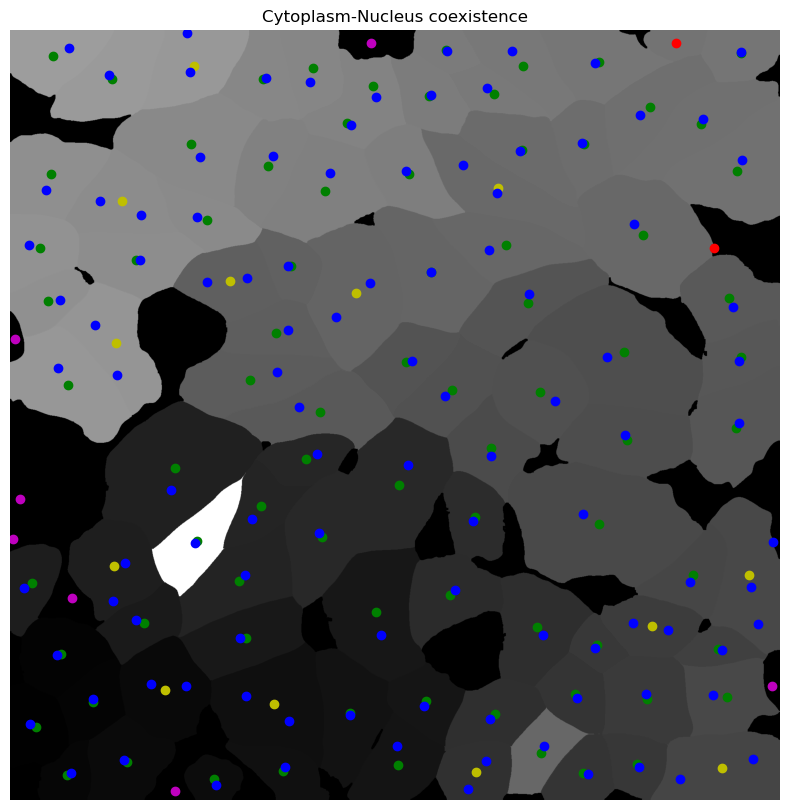

In [8]:
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import numpy as np
import builtins 


nuclei_labels = label(nuclei_masks)
cytoplasma_labels = label(cyto_masks)

cytoplasma_props = regionprops(cytoplasma_labels)
nuclei_props = regionprops(nuclei_labels)

min_area = 10  
cytoplasma_props_filtered = [prop for prop in cytoplasma_props if prop.area >= min_area]
nuclei_props_filtered = [prop for prop in nuclei_props if prop.area >= min_area]

nuclei_count_per_cytoplasm = np.zeros(len(cytoplasma_props_filtered), dtype=int)

nuclei_assigned = np.zeros(len(nuclei_props_filtered), dtype=bool)

for idx, cytoplasm_prop in enumerate(cytoplasma_props_filtered):
    cytoplasm_coords_set = set(map(tuple, cytoplasm_prop.coords))  

    for nucleus_idx, nucleus_prop in enumerate(nuclei_props_filtered):
        nucleus_coord = (int(builtins.round(nucleus_prop.centroid[0])), int(builtins.round(nucleus_prop.centroid[1])))  
        if nucleus_coord in cytoplasm_coords_set:  
            nuclei_count_per_cytoplasm[idx] += 1
            nuclei_assigned[nucleus_idx] = True 


count_yellow = 0
count_green = 0
count_red = 0
count_blue = 0
count_magenta = 0

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(cyto_masks, cmap='gray')

for idx, prop in enumerate(cytoplasma_props_filtered):
    y, x = prop.centroid
    if nuclei_count_per_cytoplasm[idx] > 1:
        ax.plot(x, y, 'yo', label='Cytoplasm with > 1 nucleus' if count_yellow == 0 else '')  # yellow colorcode
        count_yellow += 1
    elif nuclei_count_per_cytoplasm[idx] == 1:
        ax.plot(x, y, 'go', label='cytoplasm with exactly 1 nucleus' if count_green == 0 else '')  # green colorcode
        count_green += 1
    else:
        ax.plot(x, y, 'ro', label='Cytoplasm without nucleus' if count_red == 0 else '')  # red colorcode
        count_red += 1


for idx, prop in enumerate(nuclei_props_filtered):
    y, x = prop.centroid
    if nuclei_assigned[idx]:
        ax.plot(x, y, 'bo', label='nuc within cytoplasm ' if count_blue == 0 else '')  # blue colorcode
        count_blue += 1
    else:
        ax.plot(x, y, 'mo', label='nuc outside of cytoplasm' if count_magenta == 0 else '')  # magenta colorcode
        count_magenta += 1




ax.set_title('Cytoplasm-Nucleus coexistence')
ax.axis('off')
plt.show()


## load data (6hpi s5)

In [9]:
#for reference this can still be applied if you want to load the data at any point (e.g. in a napari script that shows results)
from skimage.io import imread
from skimage.measure import label, regionprops
import numpy as np
from scipy.spatial.distance import cdist
import os

rep = '2'
hpi = '6'
s = '5'
fov = '15'
round = '2'
inc = '6'
ft_values = [0.0, 1.0, 0.75, 0.5, 0.25]
ct_values = [-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0]

nuclei_folder = f'/home/s361852/Schreibtisch/data/processed/remapped_images_nuc/'
nuclei_pattern = f'remapped_{inc}Inc_PR8_Nepal_1MOI_{hpi}hpi_AllSegments_3R_50C__Region {fov}_Processed001_s0{s}_ch00_cp_masks.png'
nuclei_path = os.path.join(nuclei_folder, nuclei_pattern)
nuclei_masks = imread(nuclei_path)
nuclei_labels = label(nuclei_masks)

cyto_folder = f'/home/s361852/Schreibtisch/data/processed/postprocessed_images_cyto/'
cyto_pattern = f'outputs_remapped_ft0.0_ct-6.0_3nt3chan_rep2_1MOI_{hpi}hpi_fov{fov}_{inc}Inc_round02_ch0-2-4_s{s}_cp_masks.png'
cyto_path = os.path.join(cyto_folder, cyto_pattern)
cyto_masks = imread(cyto_path)
cytoplasma_labels = label(cyto_masks)

nuclei_GT_folder = f'/home/s361852/Schreibtisch/data/processed/ground_truth_nuc/'
nuclei_GT_pattern = f'GT_nuc_{inc}Inc_PR8_Nepal_1MOI_{hpi}hpi_AllSegments_3R_50C__Region {fov}_Processed001_s0{s}_ch00.tif'
nuclei_GT_path = os.path.join(nuclei_GT_folder, nuclei_GT_pattern)
nuclei_GT_masks = imread(nuclei_GT_path)
nuclei_GT_labels = label(nuclei_GT_masks)

cyto_GT_folder = f'/home/s361852/Schreibtisch/data/processed/ground_truth_cyto/'
cyto_GT_pattern = f'GT_3nt3chan_rep2_1MOI_{hpi}hpi_fov{fov}_6Inc_round02_ch0-2-4_s{s}.tif'
cyto_GT_path = os.path.join(cyto_GT_folder, cyto_GT_pattern)
cyto_GT_masks = imread(cyto_GT_path)
cytoplasma_GT_labels = label(cyto_GT_masks)

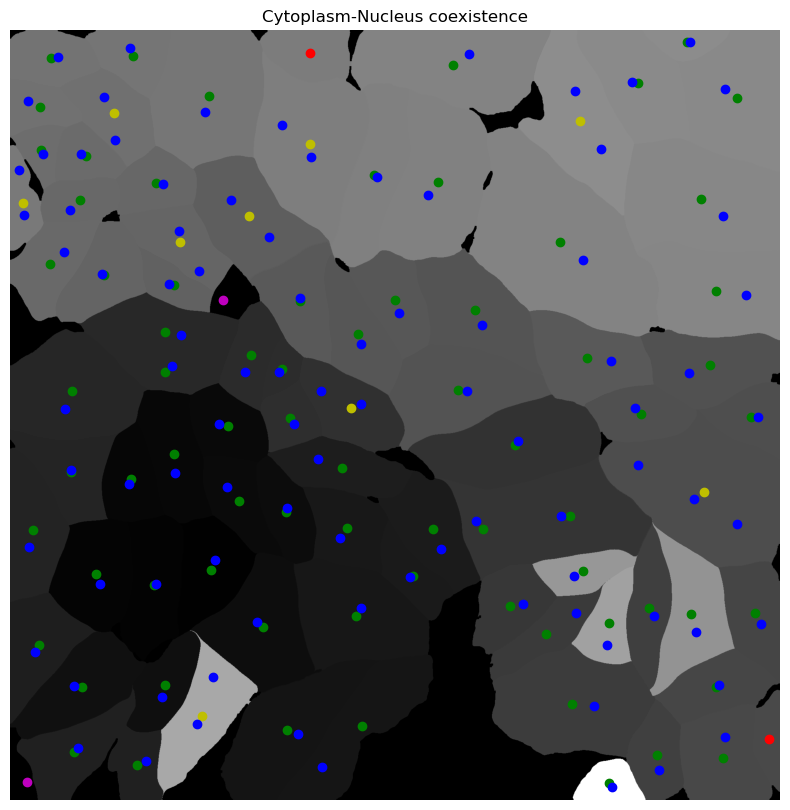

In [10]:
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import numpy as np
import builtins 


nuclei_labels = label(nuclei_masks)
cytoplasma_labels = label(cyto_masks)

cytoplasma_props = regionprops(cytoplasma_labels)
nuclei_props = regionprops(nuclei_labels)

min_area = 10  
cytoplasma_props_filtered = [prop for prop in cytoplasma_props if prop.area >= min_area]
nuclei_props_filtered = [prop for prop in nuclei_props if prop.area >= min_area]

nuclei_count_per_cytoplasm = np.zeros(len(cytoplasma_props_filtered), dtype=int)

nuclei_assigned = np.zeros(len(nuclei_props_filtered), dtype=bool)

for idx, cytoplasm_prop in enumerate(cytoplasma_props_filtered):
    cytoplasm_coords_set = set(map(tuple, cytoplasm_prop.coords))  

    for nucleus_idx, nucleus_prop in enumerate(nuclei_props_filtered):
        nucleus_coord = (int(builtins.round(nucleus_prop.centroid[0])), int(builtins.round(nucleus_prop.centroid[1])))  
        if nucleus_coord in cytoplasm_coords_set:  
            nuclei_count_per_cytoplasm[idx] += 1
            nuclei_assigned[nucleus_idx] = True 


count_yellow = 0
count_green = 0
count_red = 0
count_blue = 0
count_magenta = 0

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(cyto_masks, cmap='gray')

for idx, prop in enumerate(cytoplasma_props_filtered):
    y, x = prop.centroid
    if nuclei_count_per_cytoplasm[idx] > 1:
        ax.plot(x, y, 'yo', label='Cytoplasm with > 1 nucleus' if count_yellow == 0 else '')  # yellow colorcode
        count_yellow += 1
    elif nuclei_count_per_cytoplasm[idx] == 1:
        ax.plot(x, y, 'go', label='cytoplasm with exactly 1 nucleus' if count_green == 0 else '')  # green colorcode
        count_green += 1
    else:
        ax.plot(x, y, 'ro', label='Cytoplasm without nucleus' if count_red == 0 else '')  # red colorcode
        count_red += 1


for idx, prop in enumerate(nuclei_props_filtered):
    y, x = prop.centroid
    if nuclei_assigned[idx]:
        ax.plot(x, y, 'bo', label='nuc within cytoplasm ' if count_blue == 0 else '')  # blue colorcode
        count_blue += 1
    else:
        ax.plot(x, y, 'mo', label='nuc outside of cytoplasm' if count_magenta == 0 else '')  # magenta colorcode
        count_magenta += 1




ax.set_title('Cytoplasm-Nucleus coexistence')
ax.axis('off')
plt.show()
